In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
astroconda               /home/Jerome/miniconda3/envs/astroconda
iraf27                   /home/Jerome/miniconda3/envs/iraf27
ircs_pol                 /home/Jerome/miniconda3/envs/ircs_pol
moscatel              *  /home/Jerome/miniconda3/envs/moscatel
py27                     /home/Jerome/miniconda3/envs/py27
root                     /home/Jerome/miniconda3



* [astropy.modeling](http://docs.astropy.org/en/latest/modeling/index.html#module-astropy.modeling)
* [examples](http://docs.astropy.org/en/latest/modeling/models.html)

1D gaussian

In [6]:
from astropy.modeling.models import Gaussian1D

g = Gaussian1D(amplitude=1, mean=0, stddev=1)

g.inputs

('x',)

In [7]:
g(x=0)

1.0

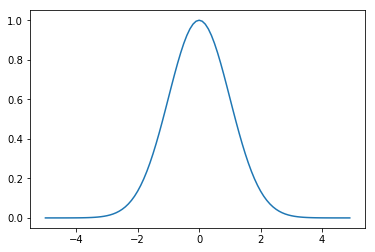

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x=np.arange(-5,5,0.1)
plt.plot(x,g(x))

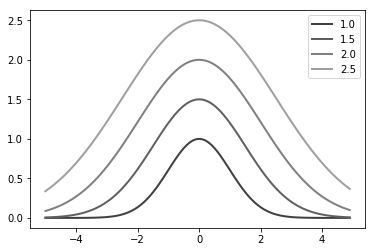

In [9]:
for factor in np.arange(1,3,0.5):
    g.amplitude = factor
    g.stddev = factor
    plt.plot(x, g(x), color=str(0.25 * factor), lw=2, label=factor)

plt.legend()
plt.show()

2D gaussian

In [10]:
from astropy.modeling.models import Gaussian2D
import numpy as np

g2 = Gaussian2D()

g2.inputs

('x', 'y')

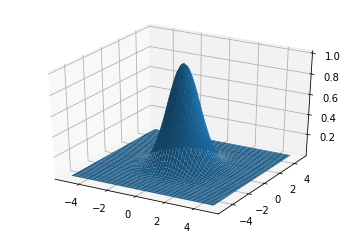

In [11]:
from mpl_toolkits.mplot3d import Axes3D

n=5
m=0.1
x, y = np.mgrid[-n:n:m, -n:n:m]
ax = plt.gca(projection='3d')
ax.plot_surface(x, y, g2(y,x))

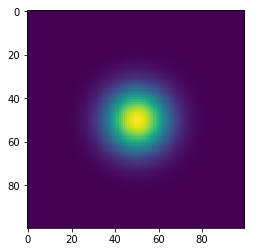

In [12]:
plt.imshow(g2(y,x))

## functional_models Module

Airy disk

In [13]:
from astropy.modeling import functional_models as model

In [14]:
a = model.AiryDisk2D(amplitude=1.0,x_0=0, y_0=0,radius=2)
a.inputs

('x', 'y')

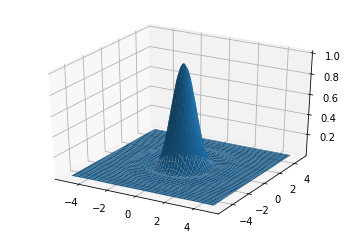

In [15]:
from mpl_toolkits.mplot3d import Axes3D

n=5
m=0.1
x, y = np.mgrid[-n:n:m, -n:n:m]
ax = plt.gca(projection='3d')
ax.plot_surface(x, y, a(y,x))

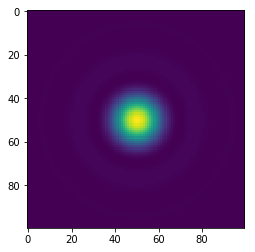

In [16]:
plt.imshow(a(y,x))

playing with shapes

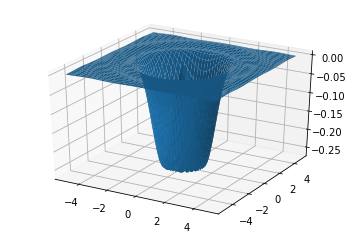

In [17]:
from mpl_toolkits.mplot3d import Axes3D

n=5
m=0.1
x, y = np.mgrid[-n:n:m, -n:n:m]
ax = plt.gca(projection='3d')
ax.plot_surface(x, y, a(y,x)-g2(y,x))

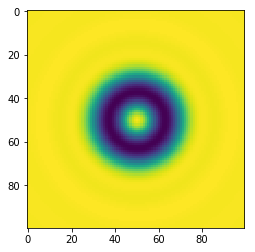

In [18]:
plt.imshow(a(y,x)-g2(y,x))

moffat 1D

In [19]:
from astropy.modeling.models import Moffat1D

s1 = Moffat1D()
s1.inputs

('x',)

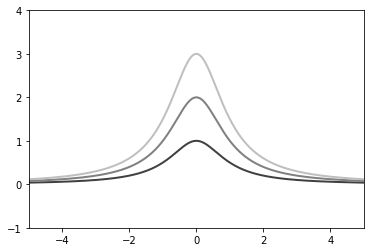

In [20]:
r = np.arange(-5, 5, .01)

for factor in range(1, 4):
    s1.amplitude = factor
    s1.width = factor
    plt.plot(r, s1(r), color=str(0.25 * factor), lw=2)

plt.axis([-5, 5, -1, 4])
plt.show()

Ring

Disk2D

## Fitting

* [example](http://docs.astropy.org/en/stable/modeling/)

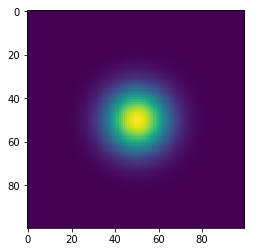

In [21]:
x, y = np.mgrid[-n:n:m, -n:n:m] #y,x
plt.imshow(g2(y,x))

In [22]:
np.max(g2(y,x))

1.0

In [23]:
psf_to_fit = g2(y,x)
psf_to_fit.shape

(100, 100)

In [24]:
from astropy.modeling import fitting
from astropy.modeling.models import Gaussian2D

amplitude, x_mean, y_mean =1,psf_to_fit.shape[0]/2,psf_to_fit.shape[1]/2
g_init = Gaussian2D(amplitude, x_mean, y_mean)
fit_g = fitting.LevMarLSQFitter()

xshape,yshape=psf_to_fit.shape[0]/2,psf_to_fit.shape[1]/2
xgrid, ygrid = np.mgrid[-xshape:xshape, -yshape:yshape]

In [25]:
g = fit_g(g_init, x, y, g2(y,x))

In [26]:
g.param_sets

array([[  1.],
       [ 50.],
       [ 50.],
       [  1.],
       [  1.],
       [  0.]])

In [49]:
g.param_names

('amplitude', 'x_mean', 'y_mean', 'x_stddev', 'y_stddev', 'theta')

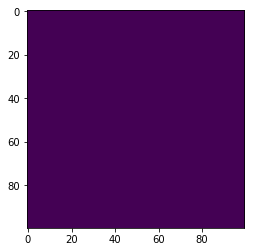

In [27]:
plt.imshow(g(y,x))